## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading data

In [2]:
df=pd.read_csv("C:\\Users\\user\\Downloads\\HousingData.csv")


In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.shape

(506, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## EDA

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Checking null values

In [7]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

## Handle Missing Values

In [8]:
from sklearn.impute import SimpleImputer
sim=SimpleImputer(missing_values=np.nan,strategy="median")
df.iloc[:,0:4]=sim.fit_transform(df.iloc[:,0:4])

In [9]:
from sklearn.impute import SimpleImputer
sim=SimpleImputer(missing_values=np.nan,strategy="mean")
df.iloc[:,[6]]=sim.fit_transform(df.iloc[:,[6]])

In [10]:
from sklearn.impute import SimpleImputer
sim=SimpleImputer(missing_values=np.nan,strategy="median")
df.iloc[:,[12]]=sim.fit_transform(df.iloc[:,[12]])

In [11]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Create Box plots

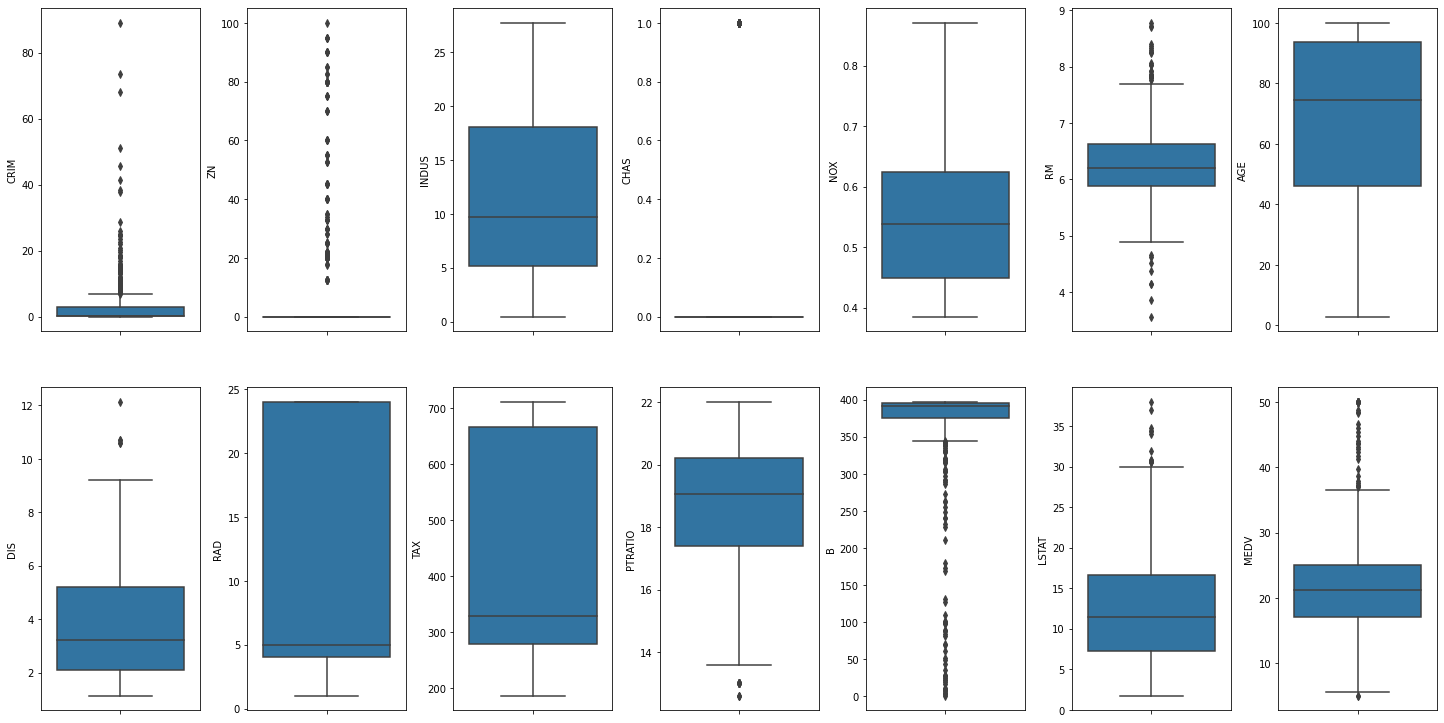

In [12]:
fig,ax=plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()
for col,val in df.items():
    sns.boxplot(y=col,data=df,ax=ax[index])
    index=index+1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)   

## Create Dist Plot

C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

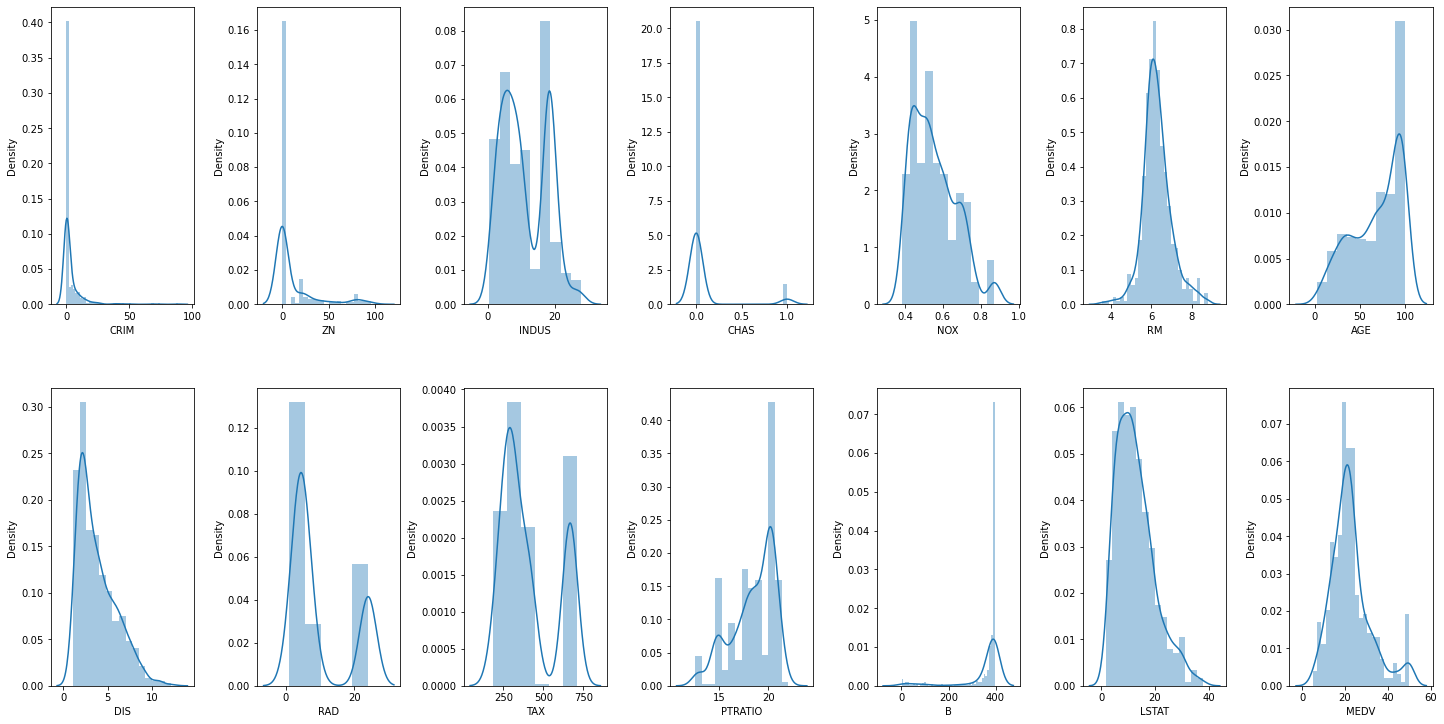

In [13]:
fig,ax=plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()
for col,val in df.items():
    sns.distplot(val,ax=ax[index])
    index=index+1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0) 

## Generating Correlation Heatmap

<AxesSubplot:>

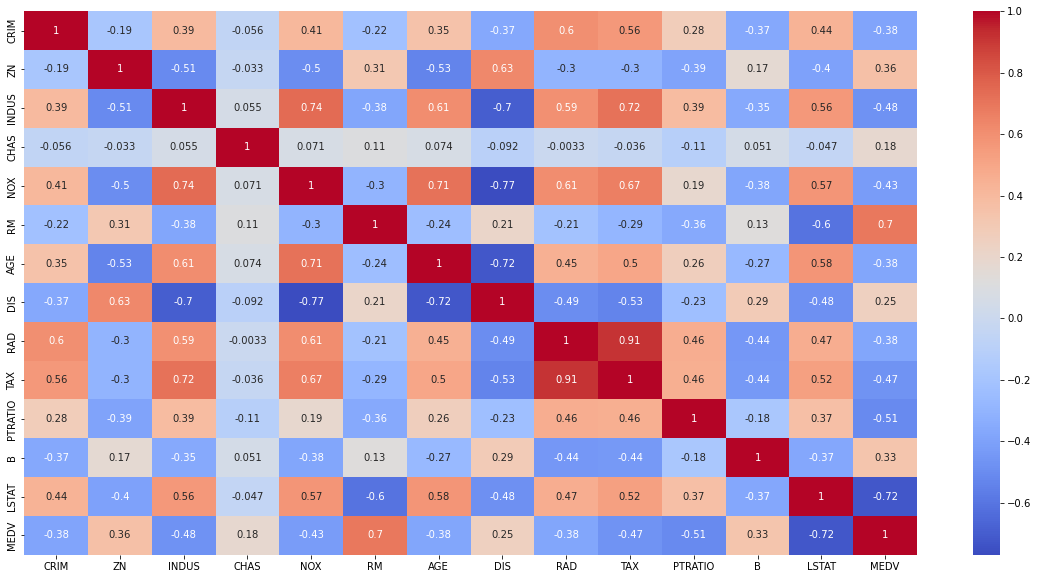

In [14]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

### So here we see that columns 'RAD' and 'TAX' are highly correlated with each other , so we have to remove any one of them for better training of our model.

In [15]:
df.drop(['RAD'],axis=1,inplace=True)

### Now visulize how 'LSTAT' and ' RM' are corrleting to the target variable

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

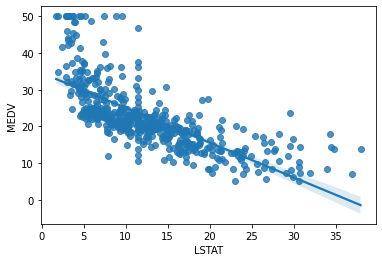

In [16]:
sns.regplot(y=df['MEDV'],x=df['LSTAT'])

Price is decreasing when LSTAT is increasing i.e negatively correlated

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

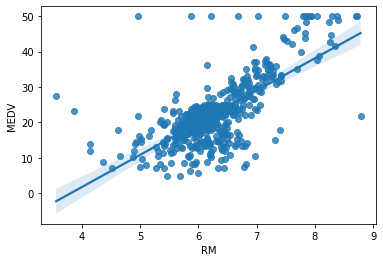

In [17]:
sns.regplot(y=df['MEDV'],x=df['RM'])

Price is increasing when RM is increasing i.e positively correlated

## Min-Max Normalization

In [18]:
cols=['CRIM','ZN','TAX','B']
for col in cols:
    #find minimum ana maximum of that column
    minimum=min(df[col])
    maximum=max(df[col])
    df[col]=(df[col]-minimum)/(maximum-minimum)

C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

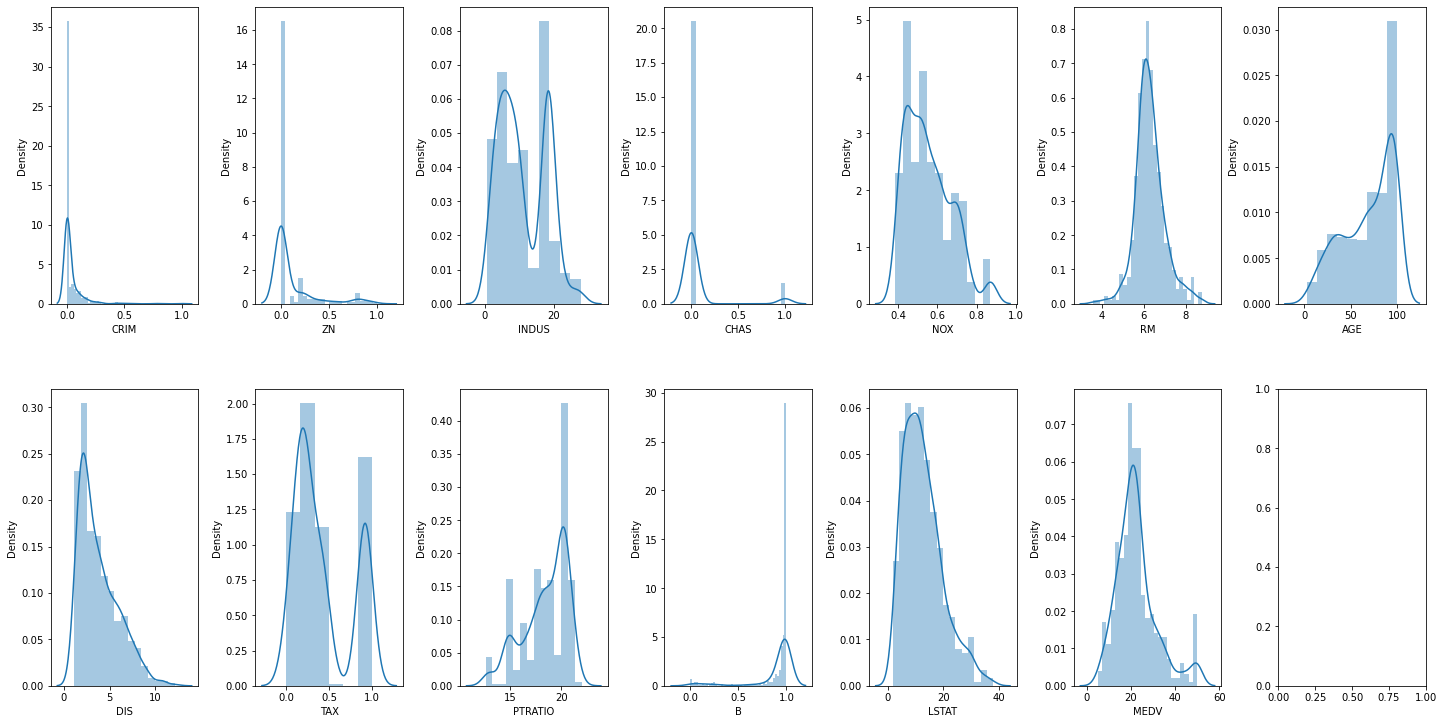

In [19]:
fig,ax=plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()
for col,val in df.items():
    sns.distplot(val,ax=ax[index])
    index=index+1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

## Splitting the dataset into independent and dependent variables

In [20]:
X=df.loc[:,df.columns!='MEDV']
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,2.31,0.0,0.538,6.575,65.200000,4.0900,0.208015,15.3,1.000000,4.98
1,0.000236,0.00,7.07,0.0,0.469,6.421,78.900000,4.9671,0.104962,17.8,1.000000,9.14
2,0.000236,0.00,7.07,0.0,0.469,7.185,61.100000,4.9671,0.104962,17.8,0.989737,4.03
3,0.000293,0.00,2.18,0.0,0.458,6.998,45.800000,6.0622,0.066794,18.7,0.994276,2.94
4,0.000705,0.00,2.18,0.0,0.458,7.147,54.200000,6.0622,0.066794,18.7,1.000000,11.43
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,11.93,0.0,0.573,6.593,69.100000,2.4786,0.164122,21.0,0.987619,11.43
502,0.000438,0.00,11.93,0.0,0.573,6.120,76.700000,2.2875,0.164122,21.0,1.000000,9.08
503,0.000612,0.00,11.93,0.0,0.573,6.976,91.000000,2.1675,0.164122,21.0,1.000000,5.64
504,0.001161,0.00,11.93,0.0,0.573,6.794,89.300000,2.3889,0.164122,21.0,0.991301,6.48


In [21]:
y=df.loc[:,'MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

## Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


In [23]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(354, 12) (152, 12) (354,) (152,)


## Fitting Gradient Boosting to the Training Set

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
gradientregressor=GradientBoostingRegressor()
gradientregressor.fit(X_train,y_train)

GradientBoostingRegressor()

## Prediction On the training data

In [25]:
y_train_pred=gradientregressor.predict(X_train)

## Evaluating Model's Perfermance on training data

In [26]:
from sklearn.metrics import r2_score
r=r2_score(y_train,y_train_pred)
print('R^2:',r)

R^2: 0.9829346205677085


## Prediction on testing data

In [27]:
y_test_pred=gradientregressor.predict(X_test)

## Evaluating Model's Perfermance on testing data

In [28]:
from sklearn.metrics import r2_score
r=r2_score(y_test,y_test_pred)
print('R^2:',r)

R^2: 0.8232473993448971


## Hyper-parameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV
abc_dict={'learning_rate':[0.15,0.1,0.10,0.05],'n_estimators':[100,150,200,250],'max_depth':[1,3,5,7,9]}
gbr_tuning=GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=abc_dict,scoring='r2')
gbr_tuning.fit(X,y)
gbr_tuning.best_params_,gbr_tuning.best_score_

({'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 250},
 0.7018504494388909)

## Again Checking Accuracy of model after hyperparameter tuning

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
gradientregressor=GradientBoostingRegressor(learning_rate=0.15,max_depth=3,n_estimators=250)
gradientregressor.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.15, n_estimators=250)

In [45]:
y_train_pred=gradientregressor.predict(X_train)

In [46]:
from sklearn.metrics import r2_score
r=r2_score(y_train,y_train_pred)
print('R^2:',r)

R^2: 0.9988240686693207


In [47]:
y_test_pred=gradientregressor.predict(X_test)

In [48]:
from sklearn.metrics import r2_score
r=r2_score(y_test,y_test_pred)
print('R^2:',r)

R^2: 0.8368062984514024
